In [1]:
import scipy.integrate as inte 
import numpy as np 
import scipy.optimize as op
import math 
import matplotlib.pyplot as plt
import emcee
import corner

Crear datos aleatoriamente

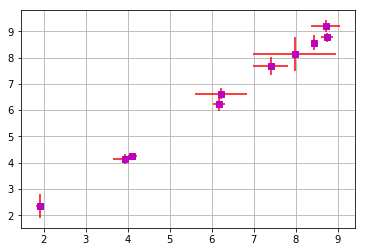

In [2]:
Num= 10 #numero de datos
C_i= 0. #cota inferior
C_s= 10. #Cota superior

a = np.random.uniform(C_i, C_s, Num)
x=sorted(a)
d = np.random.uniform(0.0,0.5,len(a))
y = x+d
# para sus barras de error
x_e=np.random.normal(0.1,0.4,len(x))
y_e=np.random.normal(0.1,0.4,len(y))
# graficar
plt.plot(x,y,'o',color='b')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.grid(True)

In [ ]:
Ajuste de minimos cuadrados

Con los daatos siguientes;
Valores de x: [1.9140497805889933, 3.9240751069359003, 4.104831279907348, 6.183258839507336, 6.224049955687967, 7.4056857793897475, 7.977771387866386, 8.42608886418318, 8.712571683423567, 8.74744229414145]
Valores de y: [2.3581261  4.1256046  4.2358913  6.21329482 6.62767025 7.68656708
 8.12344912 8.56913979 9.18625323 8.77483452]
-----------------------------------------------
Obtenamos la recta siguiente;
Pendiente real: 0.9836000923588853
Ordenada real: 0.33243650918166273


<function matplotlib.pyplot.show(*args, **kw)>

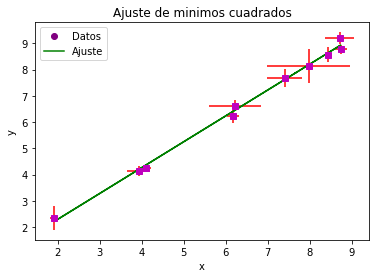

In [3]:
x2 = [(dato)**2 for dato in x]
xs=sum(x)
xss=sum(x2)

y2 = [(dato)**2 for dato in y]
ys=sum(y)
yss=sum(y2)
xy=0 
count = 0
while count < len(x):
         s=x[count]*y[count]
         xy=s+xy
         count=count+1

b=(ys*xss-xs*xy)/(len(x)*xss-xs*xs)
m=(len(x)*xy-xs*ys)/(len(x)*xss-xs*xs)


print("Con los daatos siguientes;")
print("Valores de x:",x)
print ("Valores de y:",y)
print("-----------------------------------------------")
print("Obtenamos la recta siguiente;")
print("Pendiente real:",m)
print("Ordenada real:",b)


xx=np.random.uniform(min(x),max(x),1000)
plt.plot(x,y,'o',label='Datos',color='purple')
plt.plot(xx,m*xx+b,label='Ajuste',color='green')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de minimos cuadrados')
plt.legend()
plt.show

In [17]:
#valores reales

m_real=m
b_real=b

#Desviacion del valor real
c=1
#valores para priors
m_inf=m-c
m_sup=m+c
b_inf=b-c
b_sup=b+c

In [18]:

# Usamos como modelo la funcion lineal
def modelo(x,m,b):
    return m*x+b


#Definimos el Likelihood, en funcion de los valores reales
def lnlike(x):
    m,b=x
    suma=0.0    
    if (m>m_sup) or (m<m_inf):
        return -np.infty
    if (m>b_sup) or (m<b_inf):
        return -np.infty
    evalu=f(x,m,b)
    for i in range (0,len(x)):
        suma+=-0.5*(((evalu[i]-y[i])/y_e[i]**2)**2)
    return suma

In [19]:
#Numero de parametros (dimensiones) y caminantes
nparametros,ncaminantes=2,10 
#Contador para las cadenas
post=[np.random.rand(nparametros) for i in range (ncaminantes)] 
sampler=emcee.EnsembleSampler(nwalkers,nparametros,lnlike)
results=sampler.run_mcmc(post,10000)

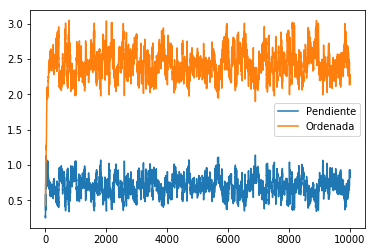

In [39]:
#plot del caminante 1, en ambos parámetros

plt.plot(sampler.chain[0,:,0],label='Pendiente')
plt.plot(sampler.chain[0,:,1],label='Ordenada')
plt.legend()

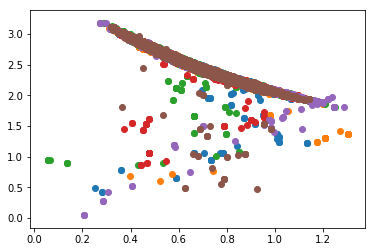

In [45]:
#gráfica de diferentes caminantes en el espacio de parámetros
plt.plot(sampler.chain[0,:,0], sampler.chain[0,:,1])
plt.plot(sampler.chain[1,:,0], sampler.chain[1,:,1])
plt.plot(sampler.chain[5,:,0], sampler.chain[5,:,1])
plt.plot(sampler.chain[7,:,0], sampler.chain[7,:,1])
plt.plot(sampler.chain[9,:,0], sampler.chain[9,:,1])
plt.plot(sampler.chain[8,:,0], sampler.chain[8,:,1])

In [22]:
sampler.flatchain

array([[0.28171615, 0.42564795],
       [0.28171615, 0.42564795],
       [0.25250803, 0.49253334],
       ...,
       [0.75165954, 2.36121111],
       [0.77765297, 2.32917525],
       [0.77229688, 2.33789073]])

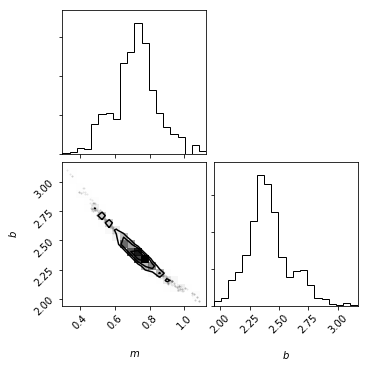

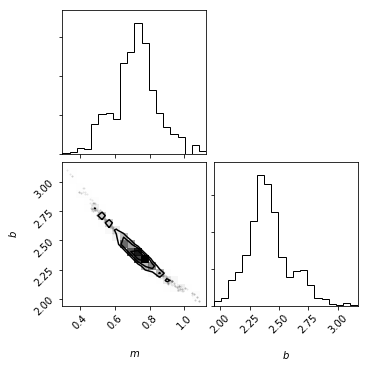

In [31]:
np.shape(sampler.flatchain)
corner.corner(sampler.flatchain[-1000:],labels=["$m$", "$b$"])

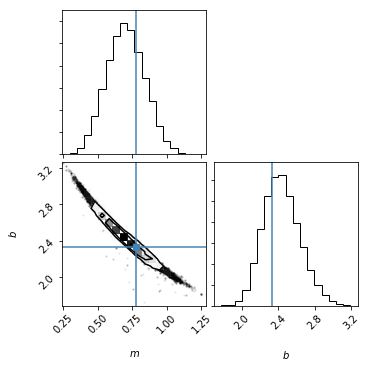

In [34]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$m$", "$b$"], truths=[0.77765297, 2.32917525])

In [40]:
#samples = sampler.chain[:, 50:, :].reshape((-1, ndim))#50:Burning

In [41]:
#fig = corner.corner(samples, labels=["$m$", "$b$"],truths=[m, b])